In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
df = pd.read_csv('data_for_geo_map_same_as_after_value_imputation.csv')

In [20]:
df.shape

(3554, 18)

In [21]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [22]:
latlong = pd.read_csv('latlong.csv')

In [23]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [24]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [25]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [26]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [27]:
new_df = df.merge(latlong, on='sector')

In [28]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [29]:
# Convert columns to numeric
cols_to_convert = ['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']
for col in cols_to_convert:
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

# Now group and take mean
group_df = new_df.groupby('sector')[[ 'price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']].mean()


In [30]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


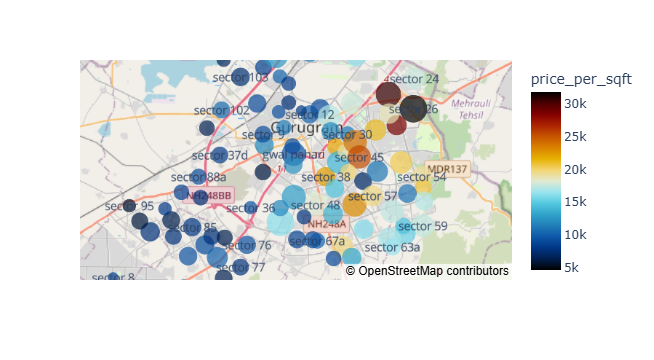

In [31]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [17]:
new_df.to_csv('data_viz1.csv',index=False)

In [32]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [33]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,8 Bedroom House for sale in Shakti Nagar,house,independent,1.80,8078.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8,5,2,not available,"20421 Shakti Nagar, Near Shree Shyam Medical S...",1.0,South,undefined,NaN,8bhk residential house for resale in shakti na...,NaN,NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
1,6 Bedroom House for sale in Sector 48 Gurgaon,house,vipul world,3.35,5583.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6,5,3+,not available,"F Block, Sector 48 Gurgaon, Gurgaon, Haryana",3.0,South,undefined,"['Airia Mall', 'GD Goenka School', 'The Millen...",6bhk residential house for resale in vipul wor...,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
2,3 BHK Flat in Sector 53 Gurgaon,flat,parsvnath exotica,4.80,14680.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3,4,3+,not available,"D4,12a, Flat 01,gurgaon, Sector 53 Gurgaon, Gu...",12.0,North-West,0 to 1 Year Old,"['Sector 53-54 Metro Station', 'Sahara Mall', ...",Spacious 2895 sqft 3 bhk with 5 bathrooms and ...,NaN,NaN,"['Green Area4 out of 5', 'Construction4 out of..."
3,3 BHK Flat in IFFCO Chowk,flat,essel tower,1.60,12185.0,1313.0,Super Built up area 1313(121.98 sq.m.),3,3,3,not available,"IFFCO Chowk, Gurgaon, Haryana",4.0,NaN,5 to 10 Year Old,"['BAPS Swaminarayan Mandir', 'Nagar Palika Hos...",This is one of the elite properties in the hea...,NaN,"['Lift(s)', 'Park', 'Maintenance Staff', 'Visi...",NaN
4,2 BHK Flat in Sector 37D Gurgaon,flat,signature global the millennia 3,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2,3,2,not available,"Sector 37D Gurgaon, Gurgaon, Haryana",8.0,NaN,12/01/2024,"['The Esplanade Mall', 'Dwarka Expressway', 'P...",Direct entrance from dwarka express way,NaN,"['Lift(s)', 'Park']","['Environment4 out of 5', 'Lifestyle4 out of 5..."


In [34]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [35]:
wordcloud_df.head()

,features,sector
0,NaN,sector 36
1,NaN,sector 89
2,NaN,sohna road
3,"['Lift(s)', 'Park', 'Maintenance Staff', 'Visi...",sector 92
4,"['Lift(s)', 'Park']",sector 102


In [36]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [37]:
main

['Lift(s)',
 'Park',
 'Maintenance Staff',
 'Visitor Parking',
 'Swimming Pool',
 'Security Personnel',
 'Fitness Centre / GYM',
 'Lift(s)',
 'Park',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Internet/wi-fi connectivity',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softening plant',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'Hig

In [38]:
from wordcloud import WordCloud

In [39]:
feature_text = ' '.join(main)

In [41]:
# To save a string to a text file
with open('wordcloud_text.txt', 'w', encoding='utf-8') as f:
    f.write(feature_text)



In [42]:
feature_text

'Lift(s) Park Maintenance Staff Visitor Parking Swimming Pool Security Personnel Fitness Centre / GYM Lift(s) Park Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Swimming Pool Park Security Personnel Natural Light Internet/wi-fi connectivity Shopping Centre Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Water softening plant Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Rece

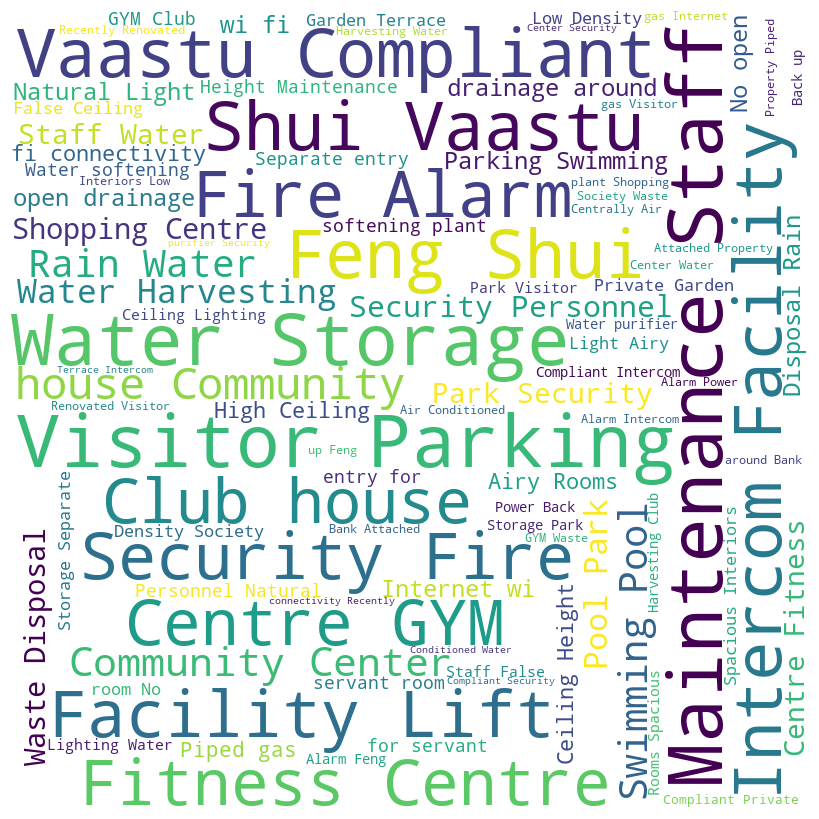

In [43]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

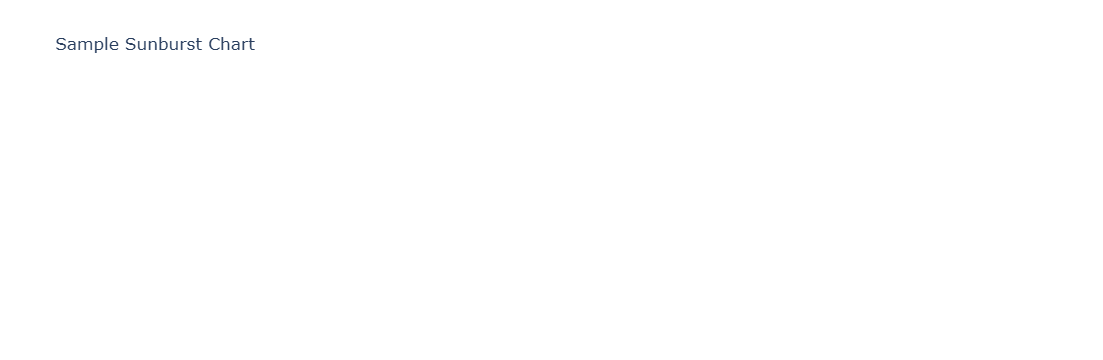

In [44]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

# area vs price

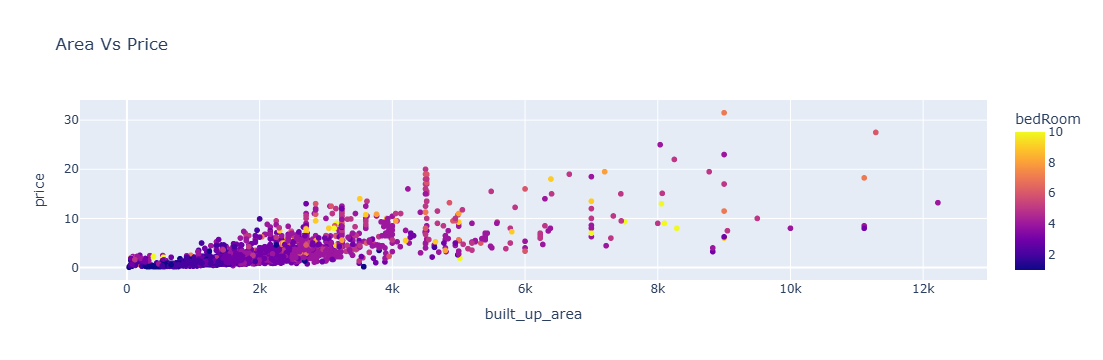

In [46]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

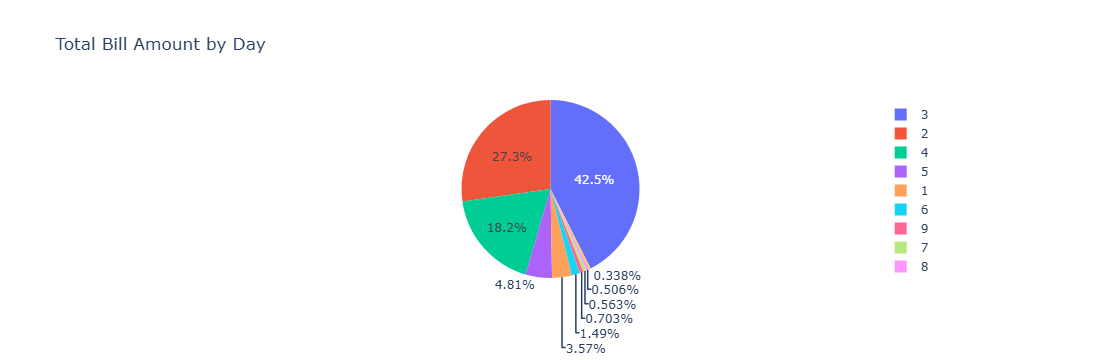

In [47]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

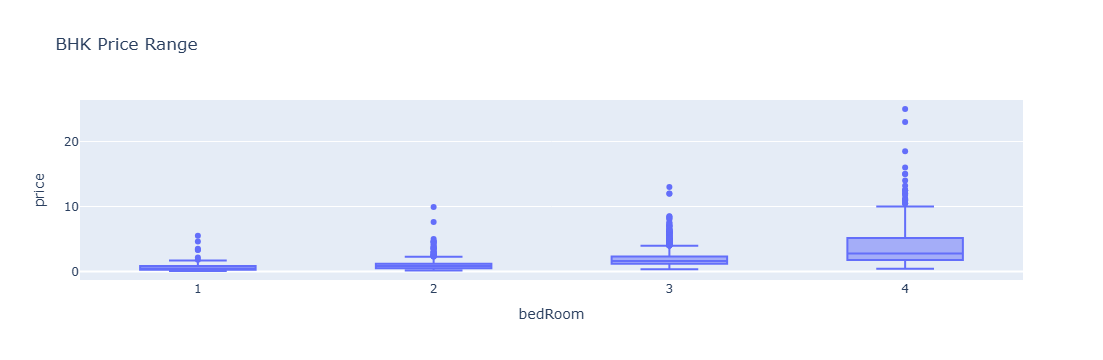

In [48]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\nikhi\AppData\Local\Temp\ipykernel_15440\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\nikhi\AppData\Local\Temp\ipykernel_15440\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

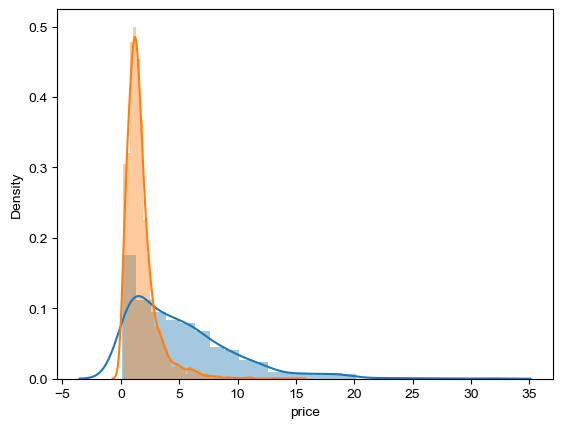

In [49]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [150]:
new_df['sector'].unique().tolist().insert(0,'overall')